In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# cost 函数
def compute_cost(X, Y, w, b):
    m = X.shape[0]
    total_cost = 0
    for i in range(m):
        total_cost += (np.dot(X[i], w) + b - Y[i]) ** 2
    total_cost /= 2 * m
    return total_cost

In [16]:
# gradient 函数
def compute_gradient(X, Y, w, b):
    m, n = X.shape
    gra_w = np.zeros(n)
    gra_b = 0
    for i in range(m):
        for j in range(n):
            gra_w[j] += (np.dot(X[i], w) + b - Y[i]) * X[i, j]
        gra_b += np.dot(X[i], w) + b - Y[i]
    gra_w /= m
    gra_b /= m
    return gra_w, gra_b

In [24]:
# 多维线性回归
def muliple_linear_regression(X, Y, w_init, b_init, alpha, num_iters, cost_func=compute_cost, gra_func=compute_gradient):
    w, b = w_init, b_init
    for i in range(num_iters):
        gra_w, gra_b = gra_func(X, Y, w, b)
        w = w - alpha * gra_w
        b = b - alpha * gra_b

        if i % math.ceil(num_iters/10) == 0:
            print(f'迭代第 {i} 次: 此时 w为{w}, b为{b:0.3e}, cost为{cost_func(X,Y,w,b):0.3e}')
    print(f'w 最终为{w}, b 最终为{b:0.3e}, cost为{cost_func(X,Y,w,b):0.3e}')
        
    return w, b

In [18]:
# 载入data
data = np.loadtxt('sample_data1.txt')
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]
print(X.shape)

(20, 1)


In [31]:
# 多维线性回归
w_init = np.zeros(X.shape[1])
b_init = 0
w_final, b_final = muliple_linear_regression(X, Y, w_init, b_init, 0.3, 400)

迭代第 0 次: 此时 w为[-0.01226339], b为4.359e-02, cost为2.278e-01
迭代第 40 次: 此时 w为[-0.75975064], b为4.297e-01, cost为1.654e-01
迭代第 80 次: 此时 w为[-1.17971418], b为6.066e-01, cost为1.477e-01
迭代第 120 次: 此时 w为[-1.40788866], b为7.027e-01, cost为1.424e-01
迭代第 160 次: 此时 w为[-1.53186037], b为7.549e-01, cost为1.409e-01
迭代第 200 次: 此时 w为[-1.59921665], b为7.833e-01, cost为1.404e-01
迭代第 240 次: 此时 w为[-1.63581265], b为7.987e-01, cost为1.403e-01
迭代第 280 次: 此时 w为[-1.65569597], b为8.071e-01, cost为1.403e-01
迭代第 320 次: 此时 w为[-1.66649898], b为8.116e-01, cost为1.402e-01
迭代第 360 次: 此时 w为[-1.67236846], b为8.141e-01, cost为1.402e-01
w 最终为[-1.67549917], b 最终为8.154e-01, cost为1.402e-01


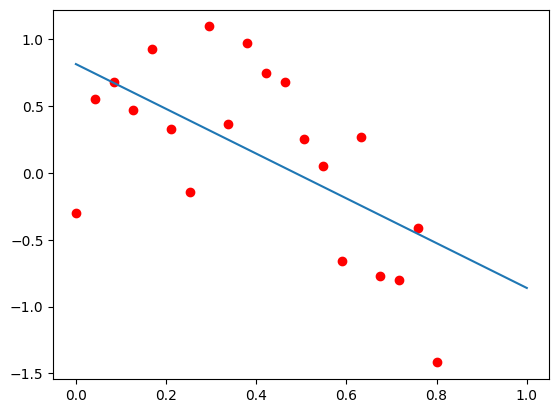

In [35]:
# 显示图形
plt.scatter(X, Y, c='r')
X_predict = np.array([0, 1])
Y_predict = X_predict * w_final + b_final
plt.plot(X_predict, Y_predict)
plt.show()